In [1]:
# import libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
from scipy import stats

## $Statistics$ using `scipy.stats`

This module contains a whole suite of functions that help the user to work on the most compelling topics in statistics such as probability distributions, summarization routines and hypothesis tests. 

### Import

    from scipy import stats

Run `info(stats)` to read an exhaustive list of this module's functionality.

---

### Statistical Distributions in `scipy.stats`

#### Continuous Random Variables

All functions concerning probability distributions are contained in `scipy.stats.` Overall, there's an exhaustive list of 

- 81 supported continuous distribution families 
    - examples include Beta, Cauchy, Chi-squared, Gamma, Weibull, Exponential, Pareto, Logistic, Gaussian, Student's t
- 12 discrete distribution families
    - such as Bernoulli, Binomial, Poisson

These distributions have methods that are also useful as random number generators. There's a simple pattern to access these: 

    scipy.stats.<distribution family>.<function>

For each of these distributions available in `scipy.stats`, we have many crucial methods. Some of the most frequently used ones are listed below

- Generate random variates `.rvs()`
- Probability Density Function as `.pdf()`
- Cumulative Distribution Function as `.cdf()` and Survival Function as `.sf()`
- Summary metrics (Mean, Variance, Skewness, Kurtosis) as `.stats()`

A simple example to get you started:

Calculate the CDF of a beta-distribution with mean = 2 and standard deviation = 3 for a given value of 0.1

    scipy.stats.beta.cdf(0.1, loc=2, scale=2)
    
---    

## Distribution Parameters - _Location, Scale & Shape_

The parameters that a distribution takes can be inspected by running

    <distribution>.numargs
    <distribution>.shapes
    
Try:

    gamma.numargs
    gamma.shapes

It is important to understand the concepts of **location** and **scale** for these continuous distributions. 

- For a Normal (Gaussian) distribution the keyword parameter 
    - `loc=` defines the mean of the distribution,  and 
    - `scale=` defines the standard deviation.  
    
For other distributions these will correspond to appropriate parameters of the distribution, which may be inspected by using the `help()` function. We can normalize any distribution by applying transformations `(X-location)/scale`.

Try:

    help(stats.weibull)

### The Shape Parameter

Some distributions, like the Gamma distribution, additionally have a **Shape** parameter that control the specifics of the distribution. As we know, the alpha parameter of the Gamma distribution controls its shape. Keeping `alpha = 1` we are able to approximate the Exponential Distribution.

### Handling Distributions with SciPy

The following steps describe how SciPy handles distributions. 

- First, a random variable class is created (using `rv_continuous` or `rv_discrete` routines). 
- Each continuous random variable has an associated 
    - probability density function (pdf), 
    - cumulative distribution function (cdf), 
    - survival function along with its inverse (sf, isf), 
    - all possible descriptive statistics.
    - the random variable (rvs), used to generate the random instances. 

For example, with a Pareto continuous random variable with parameter b = 5, to check these properties, we could issue the following commands:

In [17]:
from scipy.stats import pareto
x = np.linspace(1, 10, 1000)

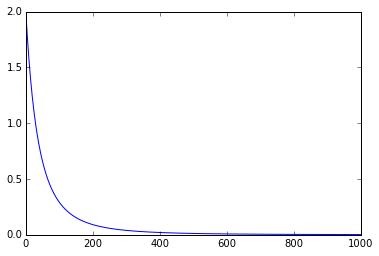

In [27]:
Series(pareto.pdf(x, 2)).plot()

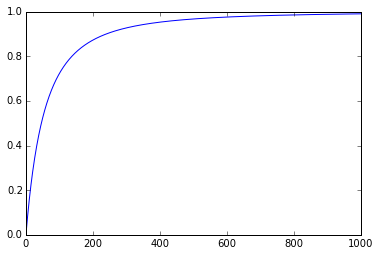

In [28]:
Series(pareto.cdf(x, 2)).plot()

---

#### A short side-note on _Freezing Distributions_

SciPy allows us to fix location, scale and shape parameters for a distribution so that subsequent function calls do not need the parameters to be passed as arguments (this is called 'freezing parameters'.)

    my_gamma = gamma(1, scale = 2.)
    my_gamma.rvs(1000)
    my_gamma.mean()
    my_gamma.std()
    

Let's take the Gaussian (Normal) distribution as an example.  

Note that with the default parameters, we get a Standard Normal Distribution (mean=0, standard deviation=1)

In [16]:
from scipy.stats import norm
print 'Extreme values of the Normal Distribution are ', norm.a, 'and', norm.b

Extreme values of the Normal Distribution are  -inf and inf


1. We generate 1000 random data points from the Normal Distribution and visualize the histogram.

Note that since we haven't passed the `loc=` or `scale=` parameters to the function, the mean will be 0 and stddev will be 1.

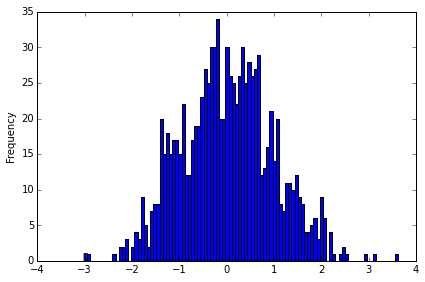

In [29]:
Series(norm.rvs(size = 1000)).plot(kind='hist', bins=100)
tight_layout()

2. Now, we visualize the Cumulative Density Function for Normal Data

Note that the CDF returns the probability that the RV is less than or equal to the value supplied. In the graph below, observe that if the supplied value is large, the probability that the RV will be lower than it will increase.

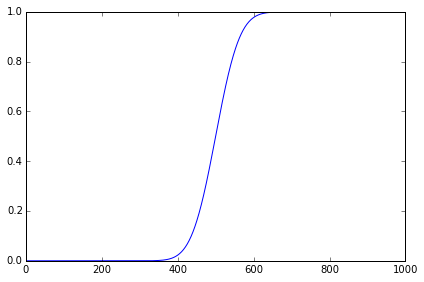

In [32]:
Series(norm.cdf(np.linspace(-10, 10, 1000))).plot()
tight_layout()

3. Similarly, we can plot the Probability Density function

Note that for continuous RVs the probability density function (PDF) measures probability with which a given value will lie in a neighborhood of the RVs values. The probability of the RV belonging in a finite interval can be computed by taking the integral of the PDF over the interval.

In the graph below, the probability of a value being close to the mean is the highest, and it drops off as we move away from the mean (ie, extreme values are rarer.)

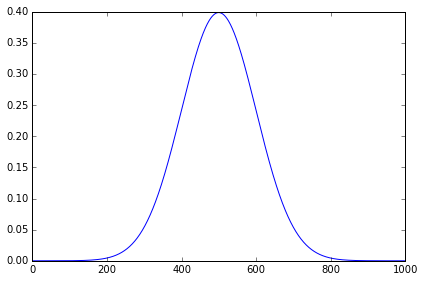

In [59]:
Series(norm.pdf(np.linspace(-5, 5, 1000))).plot()
tight_layout()

---

## Statistical Functions & Tests in `SciPy`


### 1. Statistical Summary Functions  


`SciPy` has over 60 statistical functions that are used to accomplish one of two tasks: 

- Functions that **summarize** a sample (such as `mean`, `skew`)
    - Using these functions is simple and does not require much input.
    
**Example:** Calculating the skewness of the sample using `skew()`

In [34]:
sample = stats.norm.rvs(size=100)
sskw = stats.skew(sample)
print 'Skewness=', sskw

Skewness= -0.0934206843659


In [35]:
##**Example:** Print summary stats using `describe()`
smmry = stats.describe(sample)
print smmry

DescribeResult(nobs=100, minmax=(-2.4760900928319041, 2.3002035912375596), mean=0.15787830915965603, variance=0.91896960610152401, skewness=-0.09342068436585059, kurtosis=-0.21820914618737497)


This function is handy to view a quick snapshot of your sample, it produces the following output: `count, min, max, mean, variance, skewness, kurtosis`
    
### 2. Statistical Test Functions    
    
- Functions that run **tests** on samples (such as `kstest()` and `normaltest()`)
    - Distribution tests prove indispensable in finiding if a sample of data belongs to a particular distribution or not.

As an example, suppose that we've got two distinct sets of values, which we think have been generated from Gaussian Processes (the Normal Distribution). Now, we can use a **T-test** to decide whether these two sets of observations are statistically
significantly different:

Example 1: Running a **two-sample t-test**

1.92805221178
4.9793493792


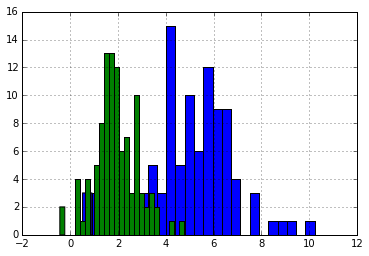

In [36]:
from scipy.stats import norm
X1 = norm.rvs(size = 100, loc = 2, scale = 1)
X2 = norm.rvs(size = 100, loc = 5, scale = 2)

# Visualize the data
Series(X2).hist(bins=25)
Series(X1).hist(bins=25)

# Check summary
print X1.mean()
print X2.mean()

In [37]:
# Run the test
stats.ttest_ind(X1, X2)
print 'Effect Size', X2.mean() - X1.mean()

Effect Size 3.05129716742


Example 2: The **Kolomogorov Smirnov Goodness-of-Fit** `kstest()` test. Here we will test the sample against the Gaussian distribution and the Wald Distribution. The statistic produced by this test is a measure of fit, a value closer to zero indicates better fit.

In [38]:
sample = stats.norm.rvs(size = 100)

ks_norm = stats.kstest(sample, 'norm')
print 'kstest: Sample vs. Normal distribution'
print 'D = ' + str(ks_norm[0])
print 'P-value = '+ str(ks_norm[1]), '\n'

ks_wald = stats.kstest(sample, 'wald')
print 'kstest: Sample vs. Wald distribution'
print 'D = '+ str(ks_wald[0])
print 'P-value = '+ str(ks_wald[1])

kstest: Sample vs. Normal distribution
D = 0.0840355218365
P-value = 0.460979692518 

kstest: Sample vs. Wald distribution
D = 0.569536156409
P-value = 0.0


### Fitting a distribution to sample data

It is common in statistics to want to estimate the probability density function (PDF) of a random variable, given a sample of data. We begin by visualizing the data as a histogram. Sometimes, we observe that the histogram of some sample data seems to fit a normal distribution. SciPy has a few routines to help us approximate the best distribution to a random variable, together with the parameters that best approximate this fit. In addition to the the methods discussed above, the following methods are also available to objects of distribution classes.

 - `fit()`: Estimates distribution parameters like shape, location, and scale using the maximum likelihood estimation (MLE) method
- `fit_loc_scale()`: Uses the provided shape parameter to estimate location and scale
- `nnlf()`: negative log likelihood function
- `expect()`: finds the expectation, E(x) of a function against the Probability Density Function

### Using the `.fit()` method (Parametric)

For example, given some seemingly Gaussian data, the mean and standard deviation of the normal distribution that realizes the best fit can be found in the following way:
   

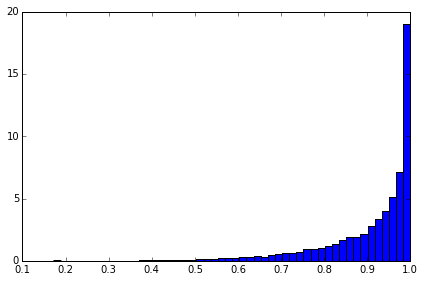

In [62]:
my_data = stats.beta.rvs(5, 0.5, size=10000)
plt.hist(my_data, normed=1, bins=50)
tight_layout()

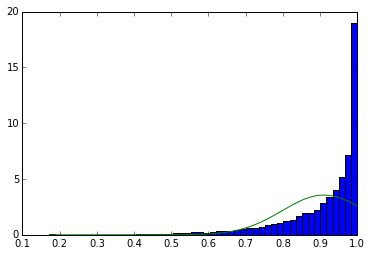

In [64]:
from scipy.stats import norm
mean, std = norm.fit(my_data)

# We can now plot the (normed) histogram of the data, 
# together with the computed probability density function, as follows:

plt.hist(my_data, normed=1, bins=50)
x = np.linspace(my_data.min(),my_data.max(),1000)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf)
plt.show()

### Using Kernel Density Estimation (Non-Parametric)

We may even fit the best probability density function without specifying any particular distribution, thanks to a non-parametric technique, **kernel density estimation.** We can find an algorithm to perform Gaussian kernel density estimation in the `scipy.stats.kde` submodule. The `gaussian_kde()` estimator can applied to both univariate and multivariate data. It is most effective if the modality of the data is one, ie, it is unimodal. Bimodal or multi-modal distributions tend to be
oversmoothed.

The function `gaussian_kde()` takes as input a **bandwidth** parameter `bw_method=...` which is used to calculate the estimator bandwidth.  It can take as values the following - `scott`, `silverman` or a constant. If the bandwidth is set to be very narrow, the estimate of the pdf is simply the sum of Gaussians around each data point.

We will take a simple example first. We will pass a floating point NumPy array to the `gaussian_kde()` function - once using the default value for bw_method, and then by using the Silverman method.

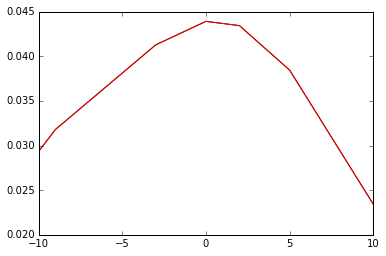

In [66]:
from scipy import stats
import matplotlib.pyplot as plt
 
x1 = np.array([-10, -9, -3, 0, 2, 5, 10], dtype=np.float)
kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method='silverman')

fig = plt.figure()
ax = fig.add_subplot(111)
 
ax.plot(x1, kde1(x1), 'k-', label="Scott's Rule")
ax.plot(x1, kde1(x1), 'r-', label="Silverman's Rule")
 
plt.show()